In [32]:
from nibabel.testing import data_path
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [33]:
mri_file = 'anat.nii.gz'
img = nib.load(mri_file)

In [34]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [35]:
print(img.shape)

(288, 288, 181)


In [37]:
# here, we're storing the header attribute in a new variable, hdr, for easy of use
hdr = img.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 288 288 181   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         0.8680556  0.8680556  1.         0.0075904  0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.028737213
quatern_c       : 0.999587
quatern_d       : 0.0
qoffset_x       : 135.12384
qoffset_y     

In [38]:
hdr.get_zooms()  # it's a 1x1x1 mm MRI file!

(0.8680556, 0.8680556, 1.0)

In [39]:
hdr.get_xyzt_units()

('mm', 'sec')

In [40]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(288, 288, 181)


In [41]:
mid_vox = img_data[118:121, 118:121, 108:111]
print(mid_vox)

[[[1516.17602539 1561.18310547 1589.3125    ]
  [1530.24072266 1538.67956543 1547.1184082 ]
  [1552.7442627  1538.67956543 1538.67956543]]

 [[1518.98901367 1572.43481445 1594.93835449]
  [1549.93127441 1572.43481445 1586.49951172]
  [1547.1184082  1552.7442627  1555.55725098]]

 [[1490.85949707 1510.5501709  1538.67956543]
  [1513.36303711 1541.49243164 1563.99609375]
  [1530.24072266 1561.18310547 1575.24780273]]]


In [43]:
mid_slice_x = img_data[150, :, :]
print(mid_slice_x.shape)

(288, 181)


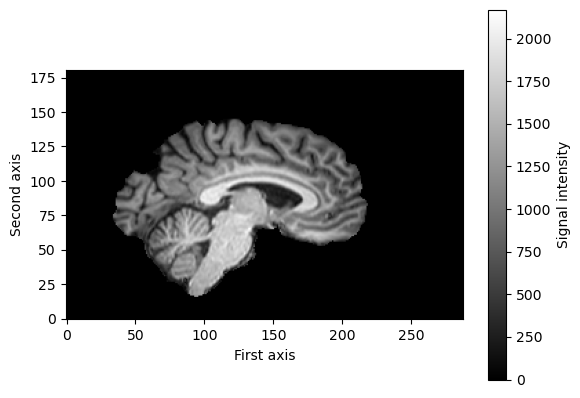

In [64]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [45]:
# import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

In [22]:
brain_vol = nib.load('anat.nii.gz')

# What is the type of this object?
type(brain_vol)

nibabel.nifti1.Nifti1Image

In [46]:
#meta data
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 288 288 181   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         0.8680556  0.8680556  1.         0.0075904  0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.028737213
quatern_c       : 0.999587
quatern_d       : 0.0
qoffset_x       : 135.12384
qoffset_y     

In [69]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)
print(brain_vol_data)
print(brain_vol_data.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(288, 288,

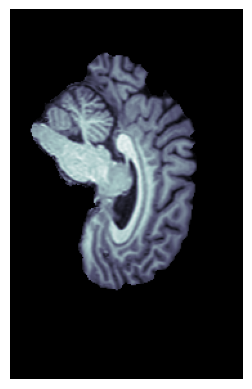

In [48]:
plt.imshow(brain_vol_data[150], cmap='bone')
plt.axis('off')
plt.show()

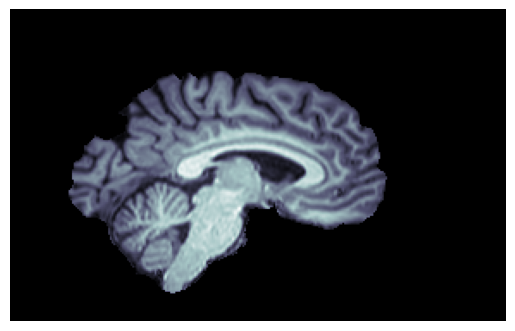

In [49]:
plt.imshow(ndi.rotate(brain_vol_data[150], 90), cmap='bone')
plt.axis('off')
plt.show()

In [50]:
print(n_subplots)
print(n_slice)
print(step_size)
print()

16
288
18


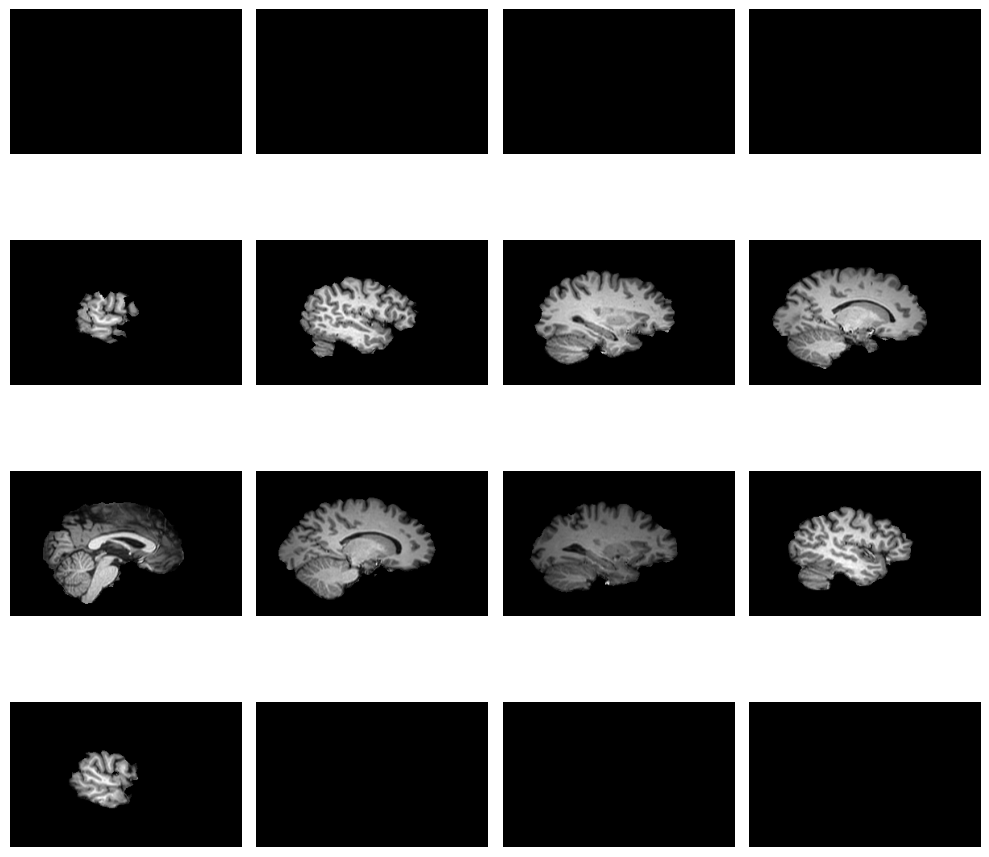

In [53]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

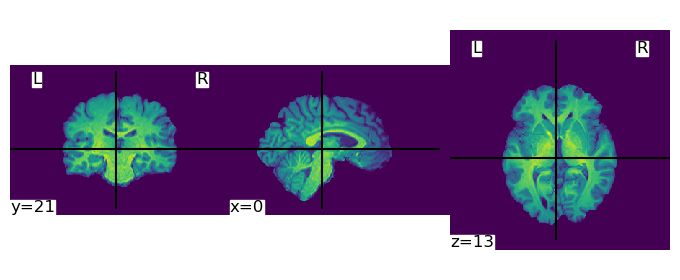

In [52]:
from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()

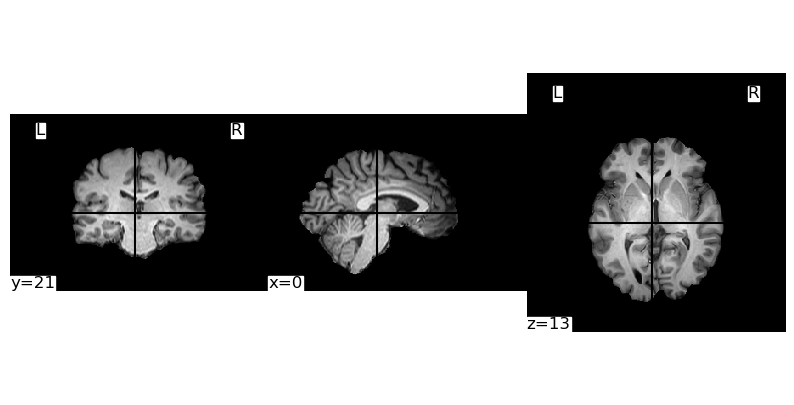

In [54]:
from nilearn import plotting

fig, ax = plt.subplots(figsize=[10, 5])
plotting.plot_img(brain_vol, cmap='gray', axes=ax)
plt.show()

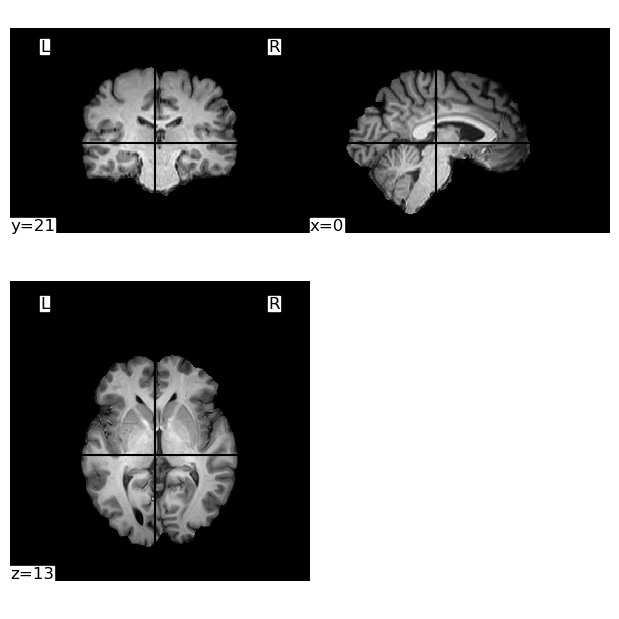

In [55]:
plotting.plot_img(brain_vol, display_mode='tiled', cmap='gray')
plt.show()

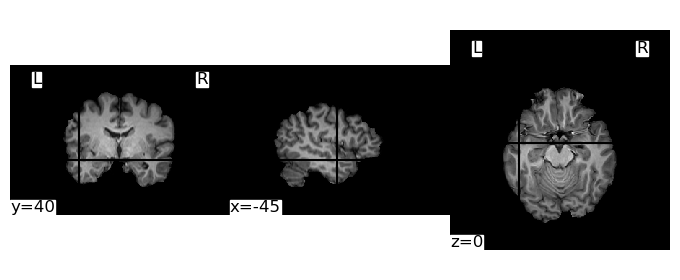

In [66]:
plotting.plot_img(brain_vol, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

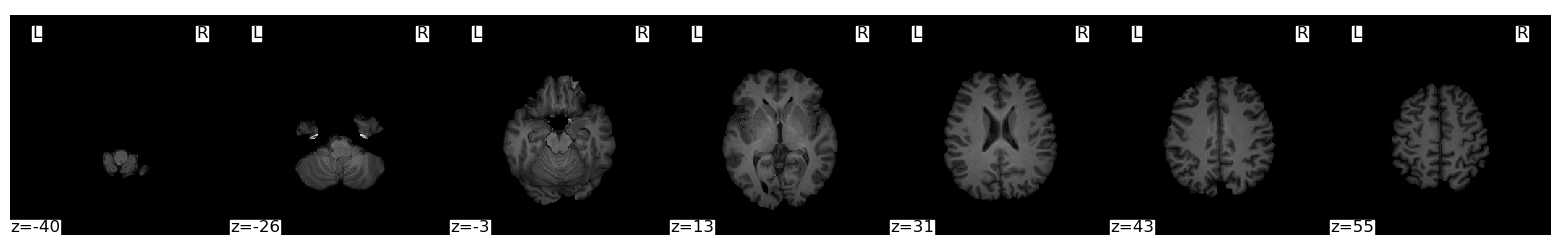

In [62]:
plotting.plot_img(brain_vol, display_mode='z', cmap='gray')
plt.show()

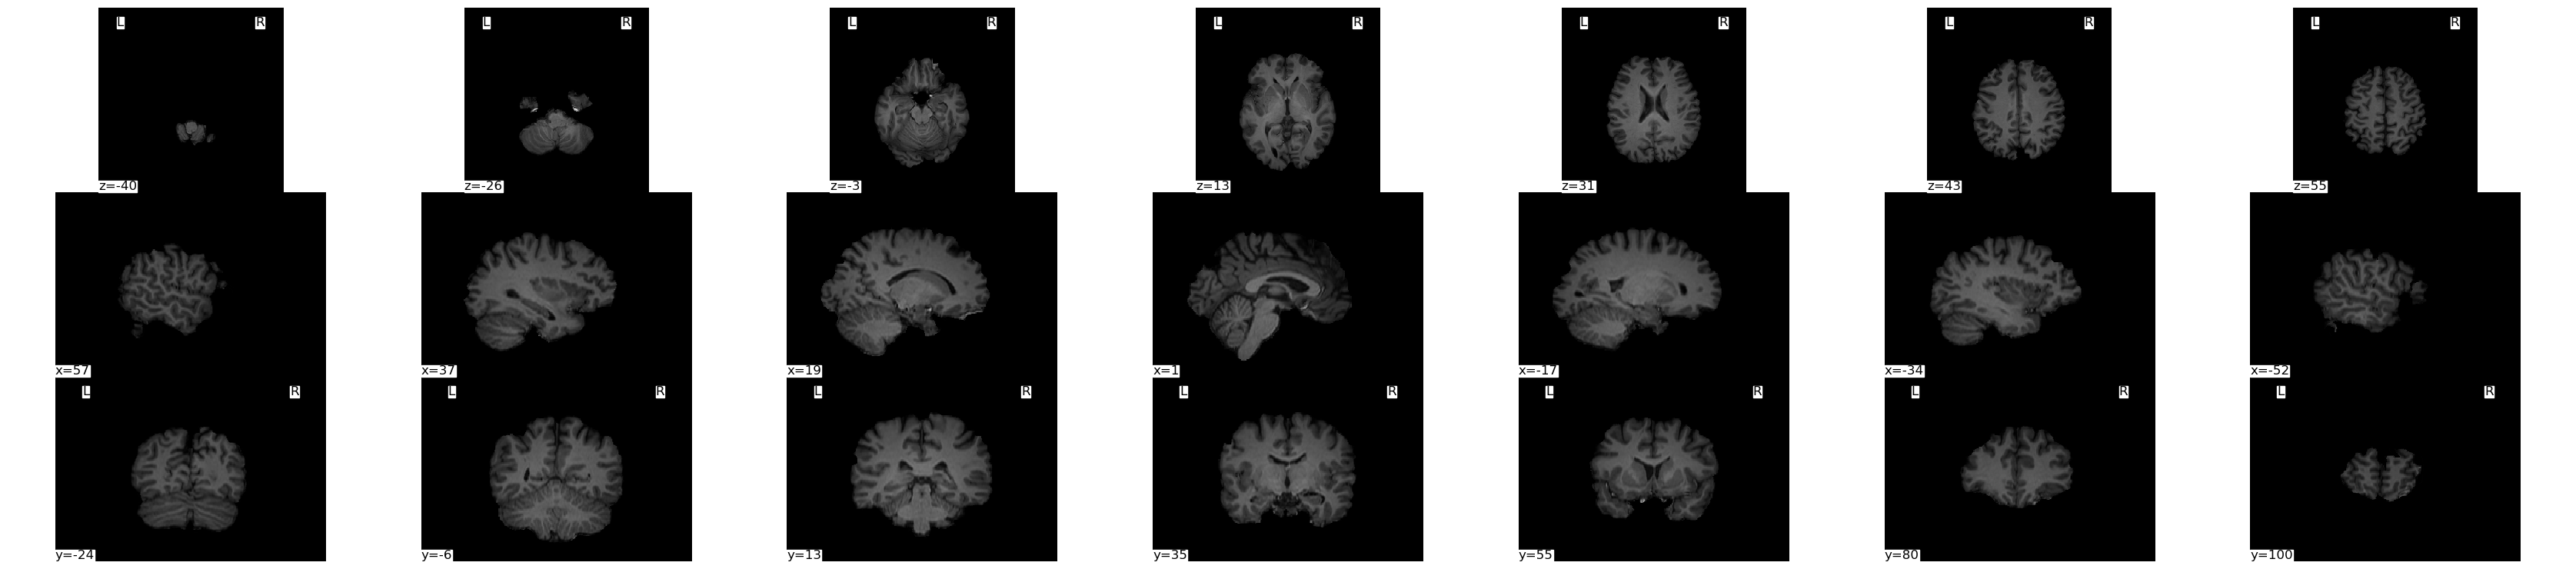

In [70]:
plotting.plot_img(brain_vol, display_mode='mosaic', cmap='gray')
plt.show()

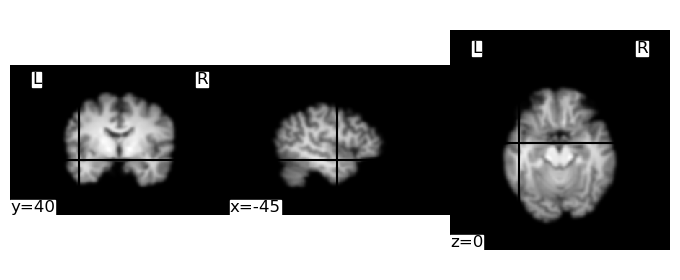

In [71]:
from nilearn import image

fwhm = 4

brain_vol_smth = image.smooth_img(brain_vol, fwhm)
plotting.plot_img(brain_vol_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

In [1]:
import nibabel as nib
import nilearn
from nilearn import plotting


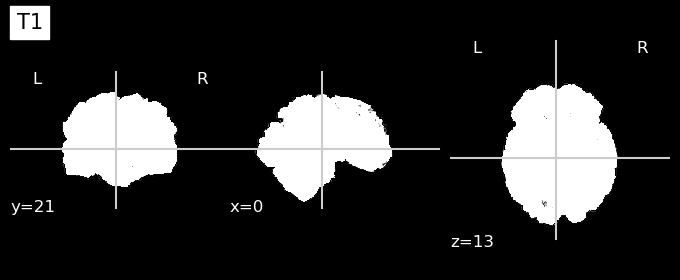

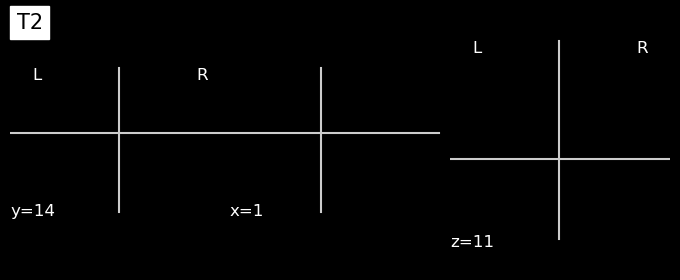

In [10]:
local_data_dir = '/home/debangshu/'
T1_filename = local_data_dir + 'anat.nii.gz'
T2_filename = local_data_dir + 'anat_csf.nii.gz'
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

# plot
plotting.plot_anat(T1_filename, title="T1", vmax=100)
plotting.plot_anat(T2_filename, title="T2", vmax=300)

In [13]:
from nipype.interfaces.ants import N4BiasFieldCorrection

In [14]:

n4 = N4BiasFieldCorrection()
n4.inputs.dimension = 3
n4.inputs.input_image = 'structural.nii'
n4.inputs.bspline_fitting_distance = 300
n4.inputs.shrink_factor = 3
n4.inputs.n_iterations = [50,50,30,20]
n4.cmdline 


'N4BiasFieldCorrection --bspline-fitting [ 300 ] -d 3 --input-image structural.nii --convergence [ 50x50x30x20 ] --output structural_corrected.nii --shrink-factor 3'